<h1>Questions to be handed in on Newton's method:</h1>

<p>Begin by loading our package that brings in plotting and other features, including those provided by the <code>Roots</code> package:</p>

In [1]:
include(download("https://raw.githubusercontent.com/mth229/MTH229.jl/master/src/229.jl"))
#using MTH229

<hr />

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/newton.html">Newton's Method</a>.</p>

<p>For the impatient, symbolic math - as is done behind the scenes at the Wolfram alpha web site - is pretty nice. For so many problems it can easily do what is tedious work. However, for some questions, only numeric solutions are possible. For example, there is no general formula to solve a fifth order polynomial the way there is a quadratic formula for solving quadratic polynomials. Even an innocuous polynomial like $f(x) = x^5 - x - 1$ has no easy algebraic solution.</p>

<p>A graph shows what looks like just one answer between $1$ and $2$, closer to $1$</p>

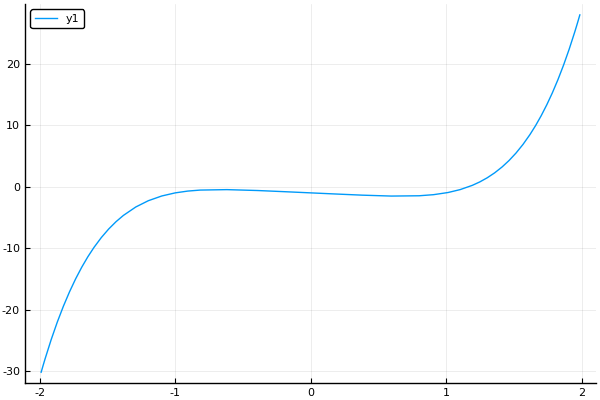

In [1]:
f(x) = x^5 - x - 1
plot(f, -2, 2)

<p>From this, we can call the bisection method to identify the value:</p>

In [1]:
fzero(f, -2, 2)

1.1673039782614185

<p>We've seen the bisection method previously to find a root, but this is somewhat cumbersome to use as it needs a <a href="https://en.wikipedia.org/wiki/Bisection_method#The_method">bracketing</a> interval to begin.</p>

<p>Here we discuss Newton's method. Like the bisection method it is an <em>iterative algorithm</em>. However instead of identifying a bracketing interval, we only need to identify a reasonable <em>initial</em> guess, $x_0$.</p>

<p>Starting with $x_0$ the algorithm to produce $x_1$ is easy:</p>

<ul>
<li><p>form the tangent line at $(x_0, f(x_0))$.</p>
</li>
<li><p>let $x_1$ be the intersection point of this tangent line:</p>
</li>
</ul>

<p>If we can go from $x_0$ to $x_1$ we can repeat to get $x_2$, $x_3$, ...</p>

<p>Graphically, this figure illustrates the process:</p>

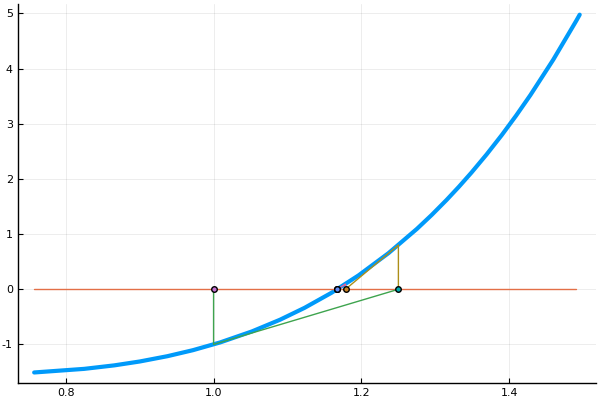

<p>In the figure, the sequence of guesses can be seen, basically $1$, $1.25$, $1.178\dots$, $1.167\dots$, ...</p>

<p>To find these numerically, we first need an algebraic representation. For this problem, we can describe the tangent line's slope by <em>either</em> $f'(x_0)$ <em>or</em> by using "rise over run":</p>


$$
f'(x_0) = \frac{f(x_0)-f(x_1)}{x_0 - x_1}
$$


<p>Using $f(x_1)=0$, this yields the update formula: $x_1 = x_0 - f(x_0) / f'(x_0)$. That is, the new guess shifts the old guess by an increment $f(x_0)/f'(x_0)$.</p>

<p>In <code>Julia</code>, we can do one step with:</p>

In [1]:
f(x) = x^5 - x - 1
x = 1
x = x - f(x) / f'(x)

1.25

<p>(We don't use indexing, but rather update our binding for the <code>x</code> variable.)</p>

<p>Is <code>x</code> close to being the zero? We don't know the actual zero - we are trying to approximate it - but we do know the function's value at the actual zero. For this new guess the function value is</p>

In [1]:
f(x)

0.8017578125

<p>This is much closer than $f(1)$, the value at our initial guess, but not nearly as close as we can get using Newton's method. We just need to <strong>iterate</strong> -  run a few more steps.</p>

<p>We do another step just by running the last line. For example, we run 5 more steps by copying and pasting the same expression:</p>

In [1]:
x = x - f(x) / f'(x)
x = x - f(x) / f'(x)
x = x - f(x) / f'(x)
x = x - f(x) / f'(x)
x = x - f(x) / f'(x)

1.1673039782614187

<p>The value of <code>x</code> updates. But is it getting closer to a <em>zero</em>? If so, then $f(x)$ should be close to zero. We can see both values with:</p>

In [1]:
x, f(x)

(1.1673039782614187, 6.661338147750939e-16)

<p>This shows $f(x)$ is not exactly $0.0$ but it is as close as we can get. Repeating the algorithm does not change the value of <code>x</code>. (On a computer, floating point issues creep in when values are close to 0, and these prevent values being mathematically exact.) As we can't improve, we stop. Our value of <code>x</code> is an <em>approximate</em> zero and <code>f&#40;x&#41;</code> is within machine tolerance of being <code>0</code>.</p>

<p>How do we know how to stop? When the algorithm works, we will stop when the <code>x</code> value <em>basically</em> stops updating, as <code>f&#40;x&#41;</code> is basically <code>0</code>. However, the algorithm need not work, so any implementation must keep track of how many steps are taken and stop when this gets out of hand.</p>

<p>For convenience, the <code>newton</code> method from the <code>Roots</code> package will iterate until convergence. If we pass in the optional argument <code>verbose&#61;true</code> we will see the sequence of steps.</p>

<p>For example, for $f(x) = x^3 - 2x - 5$, a function that Newton himself considered, a solution near $2$, is found with:</p>

In [1]:
x = 2
f(x) = x^3 - 2x -5
xstar = newton(f, 2)

2.0945514815423265

<p>We can see the approximate zero and the function value, as follows:</p>

In [1]:
xstar, f(xstar)

(2.0945514815423265, -8.881784197001252e-16)

<h3>Questions</h3>

<ul>
<li><p>This figure shows the first $5$ steps of Newton's method for solving for $f(x) = x^2 - 2$ starting at $2$.</p>
</li>
</ul>

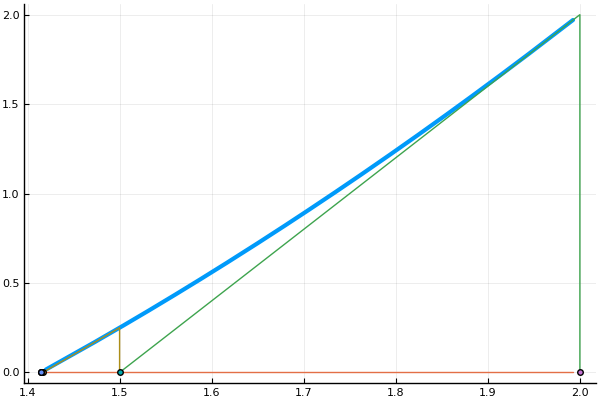

<p>From the graph, estimate the value after the <em>first</em> step.</p>

<ul>
<li><p>The function $x^2 - 4$ has a zero at $x^*=2$, of course. Here is a graph:</p>
</li>
</ul>

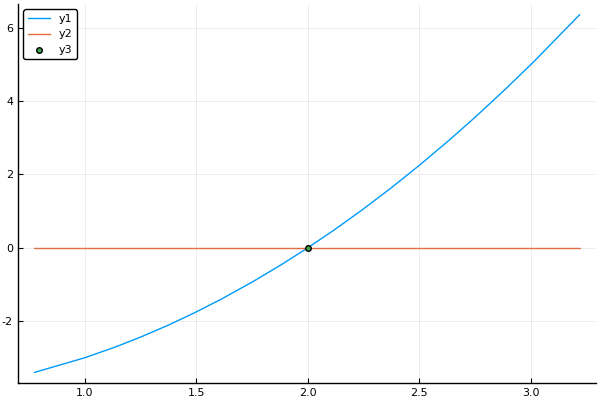

In [1]:
plot(x -> x^2 - 4, .75, 3.25)
plot!(zero, .75, 3.25)
scatter!([2], [0])

<p>For such-shaped graphs (increasing, concave up) some things will always be the case. If Newton's method is started to the <em>left</em> of $x^*$, say at $x_0=1$ then:</p>


&#10054; The value of $x_1$ will be to the left of $x_0$

&#10054; The value of $x_1$ will be between $x_0$ and $x^*$.

&#10054; The value of $x_1$ will be more than $x^*$




<p>If Newton's method is started to the <em>right</em> of $x^*$, say at $x_0=3$ then:</p>


&#10054; The value of $x_1$ will be to the right of $x_0$

&#10054; The value of $x_1$ will be between $x^*$ and $x_0$.

&#10054; The value of $x_1$ will be to the left than $x^*$




<ul>
<li><p>Apply Newton's Method to the function $f(x) = \sin(x)$ with an initial guess $3$. (This was historically used to compute many digits of $\pi$ efficiently.) What is the answer after 2 iterations? What is the value of <code>sin</code> at the answer?</p>
</li>
</ul>

<p>The value of $x$ after 2 iterations is:</p>

<p>The value of $f(x)=\sin(x)$ after 2 iterations:</p>

<ul>
<li><p>Use Newton's method to find a zero for the function $f(x)=x^5-x-1$. Start at $x=1.6$. What is the approximate root after 5 iterations? What is the value of $f(x)$ for your answer? If you do one or two more iterations, will your guess be better?</p>
</li>
</ul>

<p>The value of $x_5$ (after 5 iterations):</p>

<p>The value of $f(x_5)$ (after 5 iterations)? Choose the closest.</p>


&#10054; 1.2e-6

&#10054; 1.2e-8

&#10054; 1.2e-10

&#10054; 1.2e-12

&#10054; 1.2e-14

&#10054; 1.2e-16




<p>The value of $x_7$ (after <em>two</em> more iterations):</p>

<ul>
<li><p>Use Newton's method, through the <code>newton</code> function, to find a zero of the function $f(x) = \cos(x) - 2 x$. Make a graph to identify an initial guess.</p>
</li>
</ul>

<p>Show your commands below</p>

<p>The value of the approximate zero:</p>

<ul>
<li><p>Use Newton's method to find an intersection point of $f(x) = e^{-x^2}$ and $g(x)=3x$. (Look at $h(x) = f(x) - g(x) = 0$.) Start with a guess of $0$.</p>
</li>
</ul>

<ul>
<li><p>Use Newton's method to find <em>both</em> positive intersection points of $f(x) = e^x$ and $g(x) = 2x^2$. Make a graph to identify good initial guesses. (You need to use Newton's method twice, each with different initial guesses.)</p>
</li>
</ul>

<p>The smallest <em>positive</em> value is:</p>

<p>The largest <em>positive</em> value is:</p>

<ul>
<li><p>The function <code>f&#40;x&#41; &#61; exp&#40;x&#41; / &#40;1 &#43; 2exp&#40;x&#41;&#41;</code> has an inflection point near $-0.5$. Use Newton's method to find it. The inflection point occurs at $x=...$:</p>
</li>
</ul>

<h3>Using fzero from the Roots package</h3>

<p>As mentioned, the <code>newton</code> function in the <code>Roots</code> package implements Newton's method.  The <code>Roots</code> package also provides the <code>fzero</code> function for finding roots. We have seen it used with a bracketing interval, but it also provides a solution when just given an initial guess - like Newton's method:</p>

In [1]:
fzero(sin, 3)   # start with initial guess of 3

3.141592653589793

<p>The utility of this function is that it does not require a derivative to be taken and it is a little less sensitive than Newton's method to the initial guess. However, it can involved many more function calls, so can be slower.</p>

<hr />

<ul>
<li><p>find a zero of $f(x) = x\cdot (2+\ln(x))$ starting at $1$. What is your answer? How small is the function for this value?</p>
</li>
</ul>

<p>What is the value of the zero?</p>

<p>The value of the function at the zero?</p>

<ul>
<li><p>Use <code>fzero</code> to find when the derivative of $f(x) = 5/\cos(x) + 9/\sin(x)$ is $0$ in the interval $(0, \pi/2)$.</p>
</li>
</ul>

<ul>
<li><p>The function $f(x) = x^5 - x^4 - x^3 - x^2 - x - 1$ has a real zero near $2$. Find it:</p>
</li>
</ul>

<p>The same function has a critical point in $[-2, 1]$. Make graph to find a good approximation, then use <code>fzero</code> or Newton's method to find a more exact value for this:</p>

<ul>
<li><p>The mean value theorem states that for a function continuous on $[a,b]$ and differentiable on $(a,b)$ that there exists $c$ with $a < c < b$ such that the derivative at $c$ is equal to the slope of the secant line between $a$ and $b$. That is there is a tangent line parallel to the secant line. (Perhaps more than one, but at least one.)</p>
</li>
</ul>

<p>Where is $c$? That needs to be found. The value solves $f'(c) = (f(b)-f(a))/(b-a)$. From the graph below of $f(x) = x^x$ over $[1,2]$, estimate a possible value for $c$, then use <code>fzero</code> to find a numeric answer. (The tangent line at $x=1.25$ is seen to be not  steep enough.)</p>

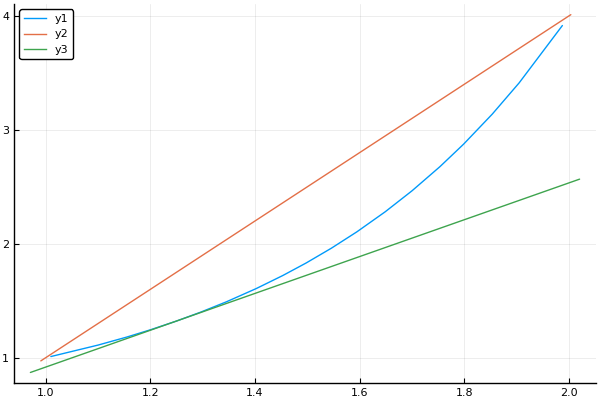

In [1]:
f(x) = x^x
a,b = 1, 2
plot(f, a, b)
plot!(secant(f, a, b))
plot!(tangent(f, 1.25))

<p>From the graph, what is a better estimate for $c$ than $1.25$? </p>

<p>What is the more precise numeric value for $c$ that you found? (Use your last guess as the starting point.)</p>

<h3>When Newton's method fails</h3>

<p>The error in Newton's method at a simple zero follows a formula: $|e_{n+1}| \leq (1/2) |f''(a)/f'(b)| \cdot |e_n|^2$, for some $a$ and $b$. Generally this ensures that the error at step $n+1$ is smaller than the error at step $n$ squared. But this can fail due to various cases:</p>

<ul>
<li><p>the initial guess is not close to the zero</p>
</li>
<li><p>the derivative, $|f'(x)|$, is too small</p>
</li>
<li><p>the second derivative, $|f''(x)|$, is too big, or possibly undefined.</p>
</li>
</ul>

<hr />

<ul>
<li><p>Earlier the roots of $f(x) = x^5 - x - 1$ were considered. Try Newton's method with an initial guess of $x_0=0$ to find a real root. Why does this fail?</p>
</li>
</ul>

<p>(You can look graphically. Otherwise, you could look at the output   of <code>newton</code> with this extra argument: <code>newton&#40;f, fp, x0,   verbose&#61;true&#41;</code>.</p>


&#10054; The initial guess is not close to the zero

&#10054; The derivative, $|f'(x)|$, is too small

&#10054; The second derivative, $|f''(x)|$, is too big, or possibly undefined




<ul>
<li><p>Let <code>f&#40;x&#41; &#61; abs&#40;x&#41;^&#40;1/3&#41;</code>. Starting at <code>x&#61;1</code>, Newton's method will fail to converge. What happens? Are any of the above 3 reason's to blame?</p>
</li>
</ul>


&#10054; The initial guess is not close to the zero

&#10054; The derivative, $|f'(x)|$, is too small

&#10054; The second derivative, $|f''(x)|$, is too big, or possibly undefined




<ul>
<li><p>Let $f(x) = x^2 - 0.01$. Though the initial value $x=0$ is very close to a zero, Newton's method will fail when started there. Why?</p>
</li>
</ul>


&#10054; The initial guess is not close to the zero

&#10054; The derivative, $|f'(x)|$, is too small

&#10054; The second derivative, $|f''(x)|$, is too big, or possibly undefined




<h3>Quadratic convergence</h3>

<p>When Newton's method converges to a <em>simple zero</em> it is said to have <em>quadratic convergence</em>. A simple zero is one with multiplicity 1 and quadratic convergence says basically that the error at the $i+1$st step is like the error for $i$th step squared. In particular, if the error is like $10^{-3}$ on one step, it will be like $10^{-6}$, then $10^{-12}$ then $10^{-24}$ on subsequent steps. (Which is typically beyond the limit of a floating point approximation.) This is why one can <em>usually</em> take just 5, or so, steps to get to an answer.</p>

<p>Not so for multiple roots and some simple roots.</p>

<ul>
<li><p>For the function <code>f&#40;x&#41; &#61; &#40;8x*exp&#40;-x^2&#41; -2x - 3&#41;^8</code>, starting with <code>x&#61;-2.0</code>, Newton's method will converge, but it will take many steps to get to an answer that has $f(x)$ around $10^{-16}$. How many? Roughly how many iterations do you need? (Use <code>verbose&#61;true</code> with <code>newton</code> to see.)</p>
</li>
</ul>


&#10054; about 5 steps

&#10054; about 10 steps

&#10054; about 15 steps

&#10054; about 20 steps

&#10054; about 25 steps

&#10054; about 30 steps

&#10054; about 35 steps

&#10054; about 40 steps




<ul>
<li><p>Repeat the above with <code>f&#40;x&#41; &#61; 8x*exp&#40;-x^2&#41; -2x - 3</code> - there is no extra power of $8$ here - and again, starting with <code>x&#61;-2.0</code>. Roughly how many iterations are needed now?</p>
</li>
</ul>


&#10054; about 5 steps

&#10054; about 10 steps

&#10054; about 15 steps

&#10054; about 20 steps

&#10054; about 25 steps

&#10054; about 30 steps

&#10054; about 35 steps

&#10054; about 40 steps




<ul>
<li><p>The value $1$ is a simple zero of $f(x) = x^{20} - 1$. A theorem can show that, in theory, Newton's method will converge for any starting point $x_0 > 0$. However, it can take awhile. How many steps does Newton's method take starting at $0.8$?</p>
</li>
</ul>